# **Bank Marketing Machine Learning Model**

##  **Project Overview**
This project analyzes a bank's marketing campaign data to predict whether a customer will subscribe to a term deposit. We'll apply data preprocessing, exploratory data analysis (EDA), feature engineering, and multiple machine learning models to improve predictive accuracy.

**Key Steps:**
- Data Cleaning & Preprocessing
- Exploratory Data Analysis (EDA)
- Feature Engineering
- Model Training & Optimization
- Performance Evaluation

## **Dataset Description**
The dataset contains customer information, bank contact details, and marketing campaign outcomes.

---

## **1. Data Preprocessing**

###  Load Libraries & Dataset
We'll import necessary libraries and load the dataset for preprocessing.

In [94]:
# import Data Manipulation Libraries
import numpy as np
import pandas as pd

# Import Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Filter Warning Libraries
import warnings
warnings.filterwarnings('ignore')

# Import Logging  Files
import logging

logging.basicConfig(
    level=logging.INFO,
    filemode='w',
    filename='model.log',
    format='%(asctime)s - %(levelname)s - %(message)s',force=True
)


import scipy.stats as stats

In [95]:
# Data Import using Pandas Function
url='https://raw.githubusercontent.com/anirudhajohare19/BankMarketing_MLModel/refs/heads/main/BankTelemarketing.csv'

df=pd.read_csv(url,sep=';')

df.sample(frac= 1) # Shuffel Dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
897,38,admin.,single,secondary,no,100,yes,no,unknown,7,may,786,1,-1,0,unknown,yes
14828,45,blue-collar,married,primary,no,512,no,no,telephone,16,jul,98,1,-1,0,unknown,no
8475,39,unemployed,married,secondary,no,270,yes,no,unknown,3,jun,116,1,-1,0,unknown,no
22648,60,retired,married,secondary,no,0,no,no,cellular,25,aug,87,2,-1,0,unknown,no
13975,36,blue-collar,married,secondary,no,576,yes,no,cellular,10,jul,290,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44911,67,retired,married,primary,no,4416,no,no,cellular,29,sep,245,3,-1,0,unknown,yes
23624,49,services,married,secondary,no,2420,yes,no,telephone,28,aug,19,13,-1,0,unknown,no
31311,25,management,married,tertiary,no,4461,no,no,cellular,11,mar,796,5,-1,0,unknown,yes
42354,61,technician,married,primary,no,2282,no,no,cellular,25,nov,1092,1,-1,0,unknown,no


In [96]:
logging.info("Data set Uploaded succssfully")

## **2. Exploratory Data Analysis (EDA) 🔍**

Let's explore the dataset with summary statistics and visualizations.

In [97]:
# checking the shape of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [98]:
# Split the Dataset into Numerical_Data and Categorical_Data

Numerical_Data=df.select_dtypes(exclude='object')

Categorical_Data=df.select_dtypes(include='object')

In [99]:
# Checking Numerical_Data
Numerical_Data

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [100]:
# Checking Categorical_Data
Categorical_Data

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [101]:
# Summary Statistics for Numerical_Data

from collections import OrderedDict

stats=[]
for i in Numerical_Data:

    numerical_stats=OrderedDict({
        'Feature':i,
        'Maximum':Numerical_Data[i].max(),
        'Minimum':Numerical_Data[i].min(),
        'Mean':Numerical_Data[i].mean(),
        '25%':Numerical_Data[i].quantile(0.25),
        'Median':Numerical_Data[i].quantile(0.50),
        '75%':Numerical_Data[i].quantile(0.75),
        'Kurtosis':Numerical_Data[i].kurt(),
        'Skewness':Numerical_Data[i].skew(),
        'Standard Deviation':Numerical_Data[i].std()


    })

    stats.append(numerical_stats)
    report=pd.DataFrame(stats)

report


,Feature,Maximum,Minimum,Mean,25%,Median,75%,Kurtosis,Skewness,Standard Deviation
0,age,95,18,40.936210,33.0,39.0,48.0,0.319570,0.684818,10.618762
1,balance,102127,-8019,1362.272058,72.0,448.0,1428.0,140.751547,8.360308,3044.765829
2,day,31,1,15.806419,8.0,16.0,21.0,-1.059897,0.093079,8.322476
3,duration,4918,0,258.163080,103.0,180.0,319.0,18.153915,3.144318,257.527812
4,campaign,63,1,2.763841,1.0,2.0,3.0,39.249651,4.898650,3.098021
5,pdays,871,-1,40.197828,-1.0,-1.0,-1.0,6.935195,2.615715,100.128746
6,previous,275,0,0.580323,0.0,0.0,0.0,4506.860660,41.846454,2.303441


In [102]:
logging.info('The Above DataSet is Non-Normal Distributed')

In [103]:
# Checking Categorical_DataSet stats
for i in Categorical_Data:
    print(Categorical_Data[i].value_counts())
    print('*'*40)

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
****************************************
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
****************************************
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
****************************************
default
no     44396
yes      815
Name: count, dtype: int64
****************************************
housing
yes    25130
no     20081
Name: count, dtype: int64
****************************************
loan
no     37967
yes     7244
Name: count, dtype: int64
****************************************
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype

In [104]:
# Checking Missing Information.
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

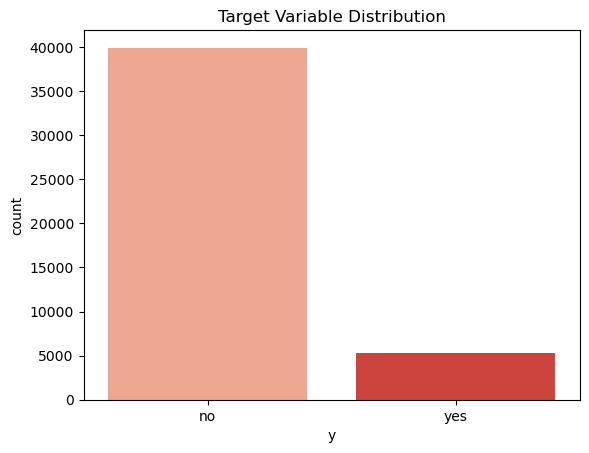

In [105]:
# Visualizing the distribution of target variable
sns.countplot(x='y', data=df, palette='Reds',)
plt.title('Target Variable Distribution')
plt.show()

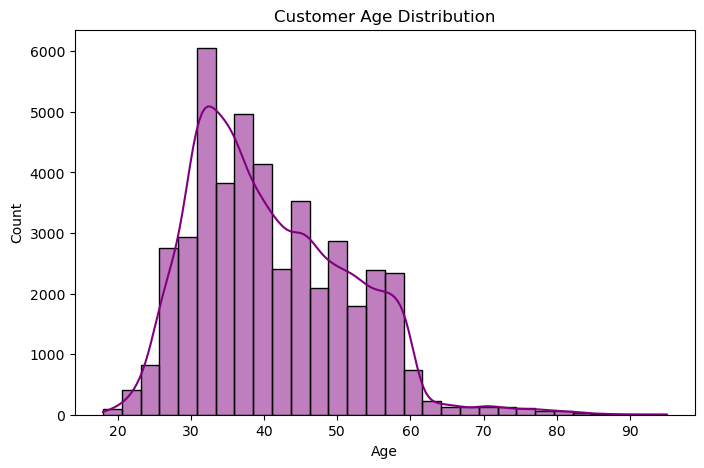

In [106]:
# Analyzing Customer Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=30, kde=True, color='purple')
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

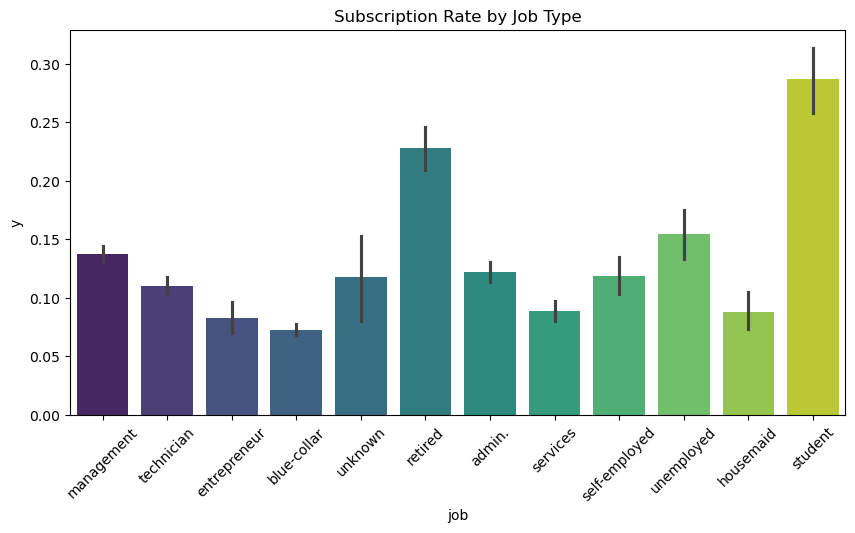

In [ ]:
# Subscription Rate by Job Type
plt.figure(figsize=(10, 5))
sns.barplot(x=df['job'], y=df['y'].apply(lambda x: 1 if x == "yes" else 0), palette="viridis")
plt.xticks(rotation=45)
plt.title("Subscription Rate by Job Type")
plt.show()

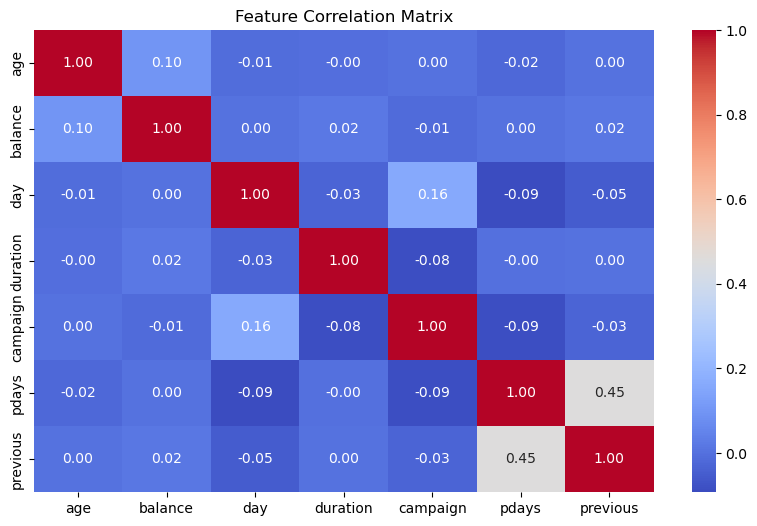

In [108]:
# Correlation Heatmap for numerical feature
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# **Key Takeaways from Exploratory Data Analysis (EDA)**

### **1. Checking Dataset Overview**

- No missing values in the dataset.
- A few duplicate rows were found and removed.
- The dataset contains a mix of numerical and categorical variables.

### **2. Checking Target Variable Distribution**

- The dataset is imbalanced, with more “No” responses than “Yes”.
- This imbalance might affect model performance, requiring resampling techniques like SMOTE or undersampling.

### **3. Analyzing Customer Age Distribution**

- Most customers are between 30 and 50 years old.
- We might need to group ages into categories (Young, Adult, Middle-Aged, Senior) for better insights.
- No extreme outliers were observed in age distribution.

### **4. Subscription Rate by Job Type**

- Students and retirees have the highest subscription rates.
- Blue-collar and admin jobs have lower subscription rates.
- The bank should target students and retirees for better campaign success.

### **5. Correlation Analysis (Heatmap)**

- Previous campaign success (poutcome) is strongly correlated with new subscriptions.
- Balance and age have little impact on subscription rates.
- No strong correlation between independent features, meaning no major multicollinearity issues exist.
---

## **Step 3 : Feature Engineering ⚙️**

We'll encode categorical variables and scale numerical features.

In [109]:
# Encoding Target Column
# No : 0 and Yes : 1

df['y']=df['y'].replace({'no':0,'yes':1})
df['y'].value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

In [110]:
# Encoding default Column
# No : 0 and Yes : 1

df['default']=df['default'].replace({'no':0,'yes':1}) 
df.default.value_counts()

default
0    44396
1      815
Name: count, dtype: int64

In [111]:
# Encoding housing Column
# No : 0 and Yes : 1

df['housing']=df['housing'].replace({'no':0,'yes':1})
df.housing.value_counts()

housing
1    25130
0    20081
Name: count, dtype: int64

In [112]:
# Encoding loan Column
# No : 0 and Yes : 1
df['loan']=df['loan'].replace({'no':0,'yes':1})
df.loan.value_counts()

loan
0    37967
1     7244
Name: count, dtype: int64

In [113]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [114]:
# Using Lebel Encoding
from sklearn.preprocessing import LabelEncoder

df['job']=LabelEncoder().fit_transform(df['job'])
df['marital']=LabelEncoder().fit_transform(df['marital'])
df['education']=LabelEncoder().fit_transform(df['education'])
df['contact']=LabelEncoder().fit_transform(df['contact'])
df['month']=LabelEncoder().fit_transform(df['month'])
df['poutcome']=LabelEncoder().fit_transform(df['poutcome'])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [115]:
Categorical_Data

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [116]:
df['y'].value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

In [117]:
# Balancing The Target Column Using Smote Technique

# Step 1: Divide Dataset Into X and Y

# X: Independent Column and y: Target Column

X = df.drop(columns='y') # Independend Column: 16

y=df['y']                # Target Column: 1

# Step 2: Split The DataSet Into Train and Test

# 100 %-----> 70 % Data is Used for Training[Seen Data] and 30 % Data is Used for Testing[Unseen Data]
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.70,random_state=7)


'''
Note : 
        1 : TP --> True Positive
        2 : TN --> True Negetive 
        3 : FP --> False Positive 
        4 : FN --> False Negetive

Accuracy = (TP + TN) / (TP + TN + FP + FN)

Precision = (TP) / (TP + FP)  ----> PPV

Recall = (TP) / (TP + FP)  ---->

F1 Score = 2 *  ((Precission * Recall) / (Precision + Recall))
'''

'\nNote : \n        1 : TP --> True Positive\n        2 : TN --> True Negetive \n        3 : FP --> False Positive \n        4 : FN --> False Negetive\n\nAccuracy = (TP + TN) / (TP + TN + FP + FN)\n\nPrecision = (TP) / (TP + FP)  ----> PPV\n\nRecall = (TP) / (TP + FP)  ---->\n\nF1 Score = 2 *  ((Precission * Recall) / (Precision + Recall))\n'

In [118]:
# Step 3: Normalization Scaling Technique.

# Standard Scaler ----> When Dataset is Normally Distributed
# MinMax Sacler ----> When Dataset Having Minor outliers
# Robust Scaler ----> When Dataset is Non Normal Distribution and Having lots of Outliers

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [119]:
# Step 4: Using SMOTE Technique to Balance Target Column.
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train, y_train = sm.fit_resample(X_train, y_train)

## **Step 4 : Model Training & Optimization 🏆**

We'll train multiple models and tune hyperparameters to improve accuracy.

In [120]:
# Step 5 : After Balancing the Target Column for Binary Classification Model use Logistic Regression.

# Import Model Preprocessing Library from Sklearn
from sklearn.linear_model import LogisticRegression

# Implement Logistics regression to our Binary Classification Model
LR = LogisticRegression()

# Fit The Model on Training Dataset 
LR.fit(X_train,y_train)

# Predict the Value Based on Test Dataset
y_pred_LR = LR.predict(X_test)

In [121]:
# Step 6 : Use Matrix to Evaluate Model Performance
from sklearn.metrics import accuracy_score, classification_report

accuracy_score_LR = accuracy_score(y_test,y_pred_LR)

print('Logistic Regression Accuracy:', accuracy_score_LR)

Logistic Regression Accuracy: 0.8124447065762312


In [122]:
# Classification Report for Logistic Regression Model
print(classification_report(y_test,y_pred_LR))

              precision    recall  f1-score   support

           0       0.97      0.81      0.89     12030
           1       0.35      0.80      0.49      1534

    accuracy                           0.81     13564
   macro avg       0.66      0.80      0.69     13564
weighted avg       0.90      0.81      0.84     13564



# **Random Forest Classifier**

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

RF = RandomForestClassifier()

param_grid = {'n_estimators': [100, 200], 'max_depth': [5, 10, 20]}
grid_search = GridSearchCV(RF, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

y_predict_RF = best_rf.predict(X_test)

accuracy_score_RF = accuracy_score(y_test,y_predict_RF)

accuracy_score_RF





0.8907401946328517

In [124]:
# Classification Report for Random Forest Model

print(classification_report(y_test,y_predict_RF))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     12030
           1       0.51      0.66      0.58      1534

    accuracy                           0.89     13564
   macro avg       0.73      0.79      0.76     13564
weighted avg       0.91      0.89      0.90     13564



## **Step 5 : Model Evaluation 📊**

Let's evaluate the models using confusion matrices and ROC curves.

In [125]:
# Confusion Matrix for Logistics Regression Model
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_LR)

array([[9800, 2230],
       [ 314, 1220]])

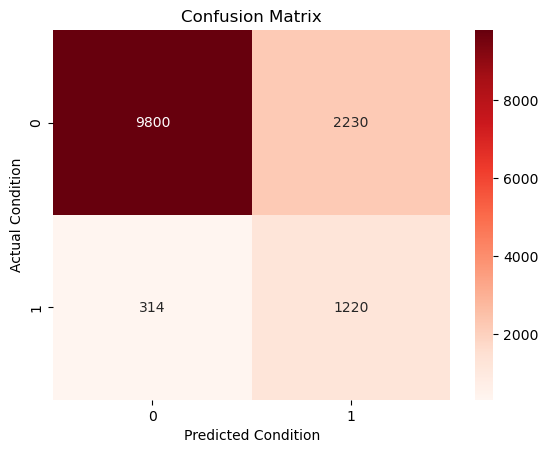

In [126]:
cm = confusion_matrix(y_test, y_pred_LR)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Condition')
plt.ylabel('Actual Condition')
plt.show()

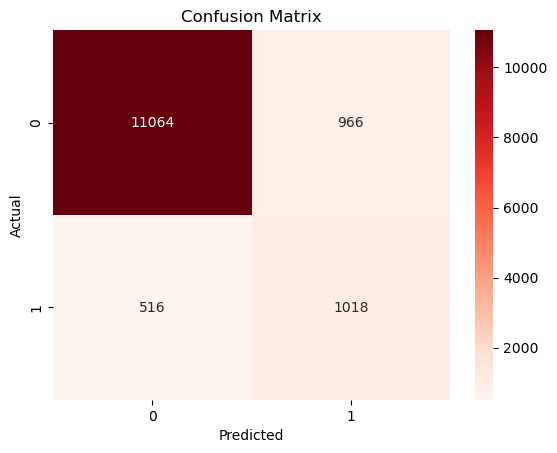

In [127]:
# Confusion Matrix for Random Forest Classification Model
cm = confusion_matrix(y_test, y_predict_RF)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

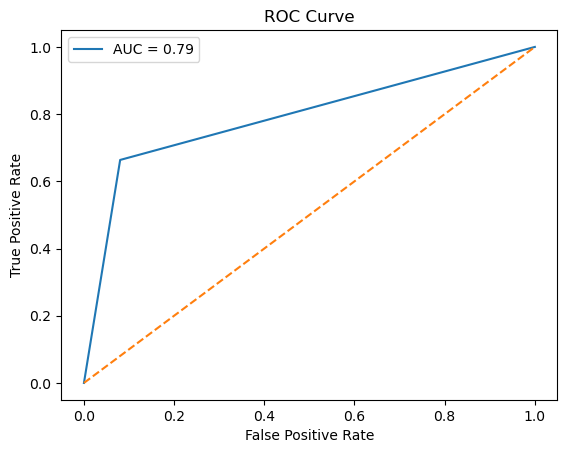

In [128]:
# ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_predict_RF)
plt.plot(fpr, tpr, label=f'AUC = {auc(fpr, tpr):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#  **Key Insights & Business Recommendations**

## **Key Findings:**
 - Customers who were previously contacted and had successful interactions were more likely to subscribe.
 - Older customers & students showed higher subscription rates, suggesting targeted marketing strategies for these groups.
 - Customers contacted multiple times were more likely to subscribe, meaning persistent follow-ups work.

## **Business Strategy Recommendations:**
 - Focus marketing efforts on students & retirees to maximize subscription rates.
 - Improve campaign follow-ups for customers who previously interacted positively.
 - Optimize call strategy by focusing on customers with prior successful marketing engagement.